# Import Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import re

# Load the datasets

In [3]:
# Load the datasets
rating_df = pd.read_csv("../data/rating.csv")
domains_location_df = pd.read_csv("../data/domains_location.csv")
traffic_data_df = pd.read_csv("../data/traffic.csv")

In [26]:
rating_df.sample(3)

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,article,title_sentiment,Domain
5137,4012,al-jazeera-english,Al Jazeera English,Al Jazeera,‘essence is the same’: ukraine’s zelenskyy lik...,Ukraine's president says Moscow and Palestinia...,https://www.aljazeera.com/news/2023/10/9/essen...,https://www.aljazeera.com/wp-content/uploads/2...,2023-10-09 11:22:27.000000,Ukraines President Volodymyr Zelenskyy has lin...,"Palestine, State of",ukrainian president says moscow and the palest...,Neutral,aljazeera.com
370,83565,al-jazeera-english,Al Jazeera English,Al Jazeera,"russia-ukraine war: list of key events, day 612","As the war enters its 612th day, these are the...",https://www.aljazeera.com/news/2023/10/29/russ...,https://www.aljazeera.com/wp-content/uploads/2...,2023-10-29 07:59:23.000000,"Here is the situation on Sunday, October 29, 2...",Malta,"as the war enters its 613th day, these are the...",Neutral,aljazeera.com
11106,50533,NaN,The Punch,Makua Ubanagu,edo 2024: pdp chieftain calls for reconciliation,A Chieftain of the Peoples Democratic Party in...,https://punchng.com/edo-2024-pdp-chieftain-cal...,https://cdn.punchng.com/wp-content/uploads/202...,2023-10-08 20:00:25.000000,A Chieftain of the Peoples Democratic Party in...,Benin,a chieftain of the peoples democratic party in...,Neutral,punchng.com


In [28]:
traffic_data_df.sample(3)

,GlobalRank,TldRank,Domain,TLD,RefSubNets,RefIPs,IDN_Domain,IDN_TLD,PrevGlobalRank,PrevTldRank,PrevRefSubNets,PrevRefIPs
239543,239544,15833,maketheroadny.org,org,756,952,maketheroadny.org,org,239899,15751,758,932
894363,894364,7991,archives13.fr,fr,242,299,archives13.fr,fr,947325,8309,233,289
836601,836602,4441,grademinerspromocode.top,top,256,277,grademinerspromocode.top,top,833275,4417,258,280


In [35]:
domains_location_df.sample(5)

,SourceCommonName,location,Country
25087,ourherald.com,US,United States
27588,radiotelevisioncaraibes.com,HA,Haiti
31771,techradar.com,US,United States
8836,digital-scholarship.org,US,United States
21139,michiganquarterlyreview.com,US,United States


# Functions

In [18]:


def extract_website(url: str, style=1):
    if style == 1:
        # Regular expression pattern to match the domain name
        pattern = r"https?://(www\.)?([^/]+)"
        match = re.match(pattern, url)
        if match:
            return match.group(2)
    else :
        domain = url.split(':')[1].strip('/').split('/')[0].strip('www.')
        return domain



In [14]:
extract_website(url)

'timesofindia.indiatimes.com'

In [21]:

# Test the function
url = "https://timesofindia.indiatimes.com/city/benga"
website = extract_website(rating_df['url'][23], style =2)
print(website)  # Output will be "timesofindia.indiatimes.com"

forbes.com


# Analysis

### Top and Bottom 10 Websites with the Largest Count of News Articles


In [22]:
rating_df['Domain'] = rating_df['url'].apply(extract_website)

In [23]:
article_counts = rating_df['Domain'].value_counts()
top_10_websites = article_counts.head(10)
bottom_10_websites = article_counts.tail(10)

In [24]:
top_10_websites

Domain
etfdailynews.com                16746
globenewswire.com                5423
economictimes.indiatimes.com     5310
globalsecurity.org               3119
forbes.com                       2784
timesofindia.indiatimes.com      2194
abcnews.go.com                   2058
businessinsider.com              2034
bbc.co.uk                        2032
punchng.com                      1800
Name: count, dtype: int64

In [25]:
bottom_10_websites

Domain
gizmodo.com                         388
readwrite.com                       324
euronews.com                        286
wired.com                           270
cnn.com                             267
theverge.com                        214
bbc.com                              81
allafrica.com                        20
cnalifestyle.channelnewsasia.com     18
cnaluxury.channelnewsasia.com         4
Name: count, dtype: int64

### Websites with the Highest Numbers of Visitors Traffic

In [31]:

traffic_data_df.sort_values(by='GlobalRank', inplace=True)

# Step 2: Websites with the Highest Numbers of Visitors Traffic
top_traffic_websites = traffic_data_df[['Domain', 'GlobalRank']].head(10)
top_traffic_websites

,Domain,GlobalRank
0,google.com,1
1,facebook.com,2
2,youtube.com,3
3,twitter.com,4
4,instagram.com,5
5,linkedin.com,6
6,apple.com,7
7,microsoft.com,8
8,googletagmanager.com,9
9,wikipedia.org,10


### Articles site with the highes ranking
- Top 10 by visitors traffick

In [32]:
articles_domain =pd.DataFrame(rating_df['Domain'].unique(),columns =['Domain'])
data_ranked_df = pd.merge(articles_domain, traffic_data_df, on ='Domain', how = 'left')
data_ranked_df.sort_values(by='GlobalRank', inplace=True)

top_traffic_domains = data_ranked_df[['Domain', 'GlobalRank']].head(10)

top_traffic_domains

,Domain,GlobalRank
0,forbes.com,64.0
21,cnn.com,78.0
6,bbc.co.uk,87.0
30,bbc.com,92.0
22,businessinsider.com,115.0
2,time.com,137.0
26,npr.org,147.0
24,wired.com,148.0
25,theverge.com,202.0
23,gizmodo.com,403.0


### Countries with the Highest Number of News Media Organizations

In [37]:

updated_article_df = pd.merge(rating_df, domains_location_df, how ='left', left_on = 'Domain', right_on ='SourceCommonName')

In [38]:
country_counts = updated_article_df['Country'].value_counts()
country_counts

Country
United States     40849
United Kingdom     2113
Nigeria            1820
India              1176
Russia             1128
Name: count, dtype: int64

### Countries with Many Articles Written about them

In [ ]:
country = [
    "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda", "Argentina", "Armenia",
    "Australia", "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium",
    "Belize", "Benin", "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei", "Bulgaria",
    "Burkina Faso", "Burundi", "Cabo Verde", "Cambodia", "Cameroon", "Canada", "Central African Republic", "Chad",
    "Chile", "China", "Colombia", "Comoros", "Congo", "Costa Rica", "Cote d'Ivoire", "Croatia",
    "Cuba", "Cyprus", "Czech", "Democratic Republic of the Congo", "Denmark", "Djibouti",
    "Dominica", "Dominican Republic", "Ecuador", "Egypt", "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia",
    "Eswatini", "Ethiopia", "Fiji", "Finland", "France", "Gabon", "Gambia", "Georgia", "Germany",
    "Ghana", "Greece", "Grenada", "Guatemala", "Guinea", "Guinea-Bissau", "Guyana", "Haiti", "Honduras", "Hungary",
    "Iceland", "India", "Indonesia", "Iran", "Iraq", "Ireland", "Israel", "Italy", "Jamaica", "Japan", "Jordan",
    "Kazakhstan", "Kenya", "Kiribati", "Kosovo", "Kuwait", "Kyrgyzstan", "Laos", "Latvia", "Lebanon", "Lesotho",
    "Liberia", "Libya", "Liechtenstein", "Lithuania", "Luxembourg", "Madagascar", "Malawi", "Malaysia", "Maldives",
    "Mali", "Malta", "Marshall Islands", "Mauritania", "Mauritius", "Mexico", "Micronesia", "Moldova", "Monaco",
    "Mongolia", "Montenegro", "Morocco", "Mozambique", "Myanmar", "Namibia", "Nauru", "Nepal",
    "Netherlands", "New Zealand", "Nicaragua", "Niger", "Nigeria", "North Korea", "North Macedonia",
    "Norway", "Oman", "Pakistan", "Palau", "Palestine State", "Panama", "Papua New Guinea", "Paraguay", "Peru",
    "Philippines", "Poland", "Portugal", "Qatar", "Romania", "Russia", "Rwanda", "Saint Kitts and Nevis",
    "Saint Lucia", "Saint Vincent and the Grenadines", "Samoa", "San Marino", "Sao Tome and Principe", "Saudi Arabia",
    "Senegal", "Serbia", "Seychelles", "Sierra Leone", "Singapore", "Slovakia", "Slovenia", "Solomon Islands",
    "Somalia", "South Africa", "South Korea", "South Sudan", "Spain", "Sri Lanka", "Sudan", "Suriname", "Sweden",
    "Switzerland", "Syria", "Taiwan", "Tajikistan", "Tanzania", "Thailand", "Timor-Leste", "Togo", "Tonga",
    "Trinidad and Tobago", "Tunisia", "Turkey", "Turkmenistan", "Tuvalu", "Uganda", "Ukraine", "United Arab Emirates",
    "United Kingdom","UK", "United States of America","USA", "Uruguay", "Uzbekistan", "Vanuatu", "Vatican City",
    "Venezuela", "Vietnam", "Yemen", "Zambia", "Zimbabwe"
]
countries = pd.DataFrame({'Countries':country}, columns = ['Countries'])
countries

In [ ]:
# in case of rerun note this code will take long so it has been commented out and replaced with the data


# # Initialize a dictionary to store counts of articles mentioning each country
country_article_counts = {}

# Loop through the list of countries
for cntry in country:
    # Check if the 'article' column mentions the country and count the occurrences
    country_article_counts[cntry] = rating_df[rating_df['article'].str.contains(cntry, case=False)].shape[0]

# Display the counts of articles mentioning each country
pd.Series(country_article_counts)
# for country, count in country_article_counts.items():
#     print(f"{country}: {count} articles")


## Replaced
# country_mentions = pd.read_csv('..\data\countries_mentions.csv')

In [ ]:
country_mentions = pd.Series(country_article_counts)


In [ ]:
# Filter out countries with zero mentions
country_mentions_filtered = country_mentions[country_mentions != 0]

# Sort the Series by number of mentions
country_mentions_sorted = country_mentions_filtered.sort_values(ascending=False)

# Display the sorted Series
# print(country_mentions_sorted)
country_mentions_sorted

In [ ]:
cdf = country_mentions.to_frame().reset_index()
cdf.columns = ['Countries','Mentions']

In [ ]:
cdf.to_csv('..\data\countries_mentions.csv')

In [ ]:

rating_df[rating_df.description.isna()]

### Websites Reporting About Specific Countries/Regions

In [40]:
# Drop rows with NaN values in the 'description' column
rating_df_filtered = rating_df.dropna(subset=['description'])

# Step 5: Websites Reporting About Specific Countries/Regions
country_specific_websites = rating_df_filtered[rating_df_filtered['description'].str.contains('|'.join(['Africa', 'US', 'China', 'EU', 'Russia', 'Ukraine', 'Middle East']), case=False)]['Domain'].value_counts()

# Display the result
print(country_specific_websites)

Domain
etfdailynews.com                    5040
globenewswire.com                   2571
economictimes.indiatimes.com        2246
globalsecurity.org                  1391
timesofindia.indiatimes.com         1144
forbes.com                           980
businessinsider.com                  952
punchng.com                          866
abcnews.go.com                       852
rt.com                               756
bbc.co.uk                            631
ibtimes.com                          626
marketscreener.com                   626
phys.org                             623
aljazeera.com                        600
deadline.com                         555
boingboing.net                       419
npr.org                              406
indianexpress.com                    392
channelnewsasia.com                  355
digitaltrends.com                    230
time.com                             208
gizmodo.com                          202
readwrite.com                        183
androidce

### Websites with the Highest Count of Positive, Neutral, and Negative Sentiment

In [45]:
# Step 6: Websites with the Count of Positive, Neutral, and Negative Sentiment using pivot_table()
sentiment_counts = rating_df.pivot_table(index='Domain', columns='title_sentiment', aggfunc='size', fill_value=0)

#### Highest negative Count

In [46]:
sentiment_counts['Negative'].idxmax()

'businessinsider.com'

#### Highest Neutral Count

In [47]:
sentiment_counts['Neutral'].idxmax()

'etfdailynews.com'

#### Highest Positive Count

In [48]:
sentiment_counts['Positive'].idxmax()

'etfdailynews.com'

In [68]:
sentiment_counts['Total'] =  sentiment_counts.iloc[:,0:3].sum(axis=1)

In [71]:
sentiment_counts.sort_values(by = 'Total',ascending=False)

title_sentiment,Negative,Neutral,Positive,Total
Domain,,,,
etfdailynews.com,560,15194,992,16746
globenewswire.com,27,4491,905,5423
economictimes.indiatimes.com,744,3634,932,5310
globalsecurity.org,747,2255,117,3119
forbes.com,216,1933,635,2784
timesofindia.indiatimes.com,466,1515,213,2194
abcnews.go.com,726,1193,139,2058
businessinsider.com,890,907,237,2034
bbc.co.uk,828,1135,69,2032


Note:
- The etfdailynews has the highest number of positive and neutral reviews
- this is possible because it has much larger number of articles in the corpus as compared to other domains
- to get a proper understandig of the ratio of the sentiment, proportion is needed.

#### Websites with the Highest Proportion of Positive, Neutral, and Negative Sentiment

In [49]:

# Step 6: Websites with the Proportion of Positive, Neutral, and Negative Sentiment using pivot_table()
sentiment_proportions = rating_df.pivot_table(index='Domain', columns='title_sentiment', aggfunc='size', fill_value=0)

# Calculate the total count of articles for each domain
total_counts = sentiment_proportions.sum(axis=1)

# Divide each count by the total count for each domain to get proportions
sentiment_proportions = sentiment_proportions.div(total_counts, axis=0)

#### Highest Negative Proportion

In [58]:
sentiment_proportions.loc[sentiment_proportions['Negative'].idxmax(),:]

title_sentiment
Negative    0.437561
Neutral     0.445919
Positive    0.116519
Name: businessinsider.com, dtype: float64

#### Highest Neutral Proportion

In [59]:
sentiment_proportions.loc[sentiment_proportions['Neutral'].idxmax(),:]

title_sentiment
Negative    0.033441
Neutral     0.907321
Positive    0.059238
Name: etfdailynews.com, dtype: float64

#### Highest Postive proportion

In [60]:
sentiment_proportions.loc[sentiment_proportions['Positive'].idxmax(),:]

title_sentiment
Negative    0.072797
Neutral     0.406130
Positive    0.521073
Name: androidcentral.com, dtype: float64

In [64]:
sentiment_proportions.loc['etfdailynews.com', :]

title_sentiment
Negative    0.033441
Neutral     0.907321
Positive    0.059238
Name: etfdailynews.com, dtype: float64

- Androidcentral.com has the highest positive proportion 

#### Comparison of Sentiment

In [61]:
# Comparison of Mean/Average and Median Sentiment
sentiment_comparison = sentiment_counts.describe()
sentiment_comparison 

title_sentiment,Negative,Neutral,Positive
count,33.000000,33.000000,33.000000
mean,276.757576,1300.787879,190.818182
std,280.594907,2687.281314,273.581164
min,0.000000,2.000000,0.000000
25%,42.000000,212.000000,33.000000
50%,185.000000,698.000000,78.000000
75%,455.000000,1167.000000,170.000000
max,890.000000,15194.000000,992.000000


### Distribution of Sentiments for Top 10 Domains by Visitors Traffic

In [73]:
sent_dist = pd.merge(top_traffic_domains,sentiment_counts.reset_index(), on = 'Domain')
sent_dist

,Domain,GlobalRank,Negative,Neutral,Positive,Total
0,forbes.com,64.0,216,1933,635,2784
1,cnn.com,78.0,102,142,23,267
2,bbc.co.uk,87.0,828,1135,69,2032
3,bbc.com,92.0,26,50,5,81
4,businessinsider.com,115.0,890,907,237,2034
5,time.com,137.0,185,382,33,600
6,npr.org,147.0,279,617,85,981
7,wired.com,148.0,65,138,67,270
8,theverge.com,202.0,35,118,61,214
9,gizmodo.com,403.0,76,253,59,388


### Comparing Metadata

In [74]:
# Step 7: Compare Content Metadata Across Sites

# Clean 'article' and 'title' columns
rating_df['clean_article'] = rating_df['article'].str.replace(r'\s+', ' ', regex=True)
rating_df['clean_title'] = rating_df['title'].str.replace(r'\s+', ' ', regex=True)

# Count number of words in 'clean_article' and 'clean_title'
rating_df['article_word_count'] = rating_df['clean_article'].str.split().apply(len)
rating_df['title_word_count'] = rating_df['clean_title'].str.split().apply(len)

In [75]:
# Split 'author' strings by newline characters and count the number of authors
rating_df['author_count'] = rating_df['author'].fillna('Not Given').str.split('\n').apply(len)

# Group by 'Domain' and calculate the mean and standard deviation for each metadata across sites
metadata_comparison = rating_df.groupby('Domain').agg({
    'article_word_count': ['mean', 'std'],
    'title_word_count': ['mean', 'std'],
    'author_count': ['mean', 'std']
})

# Add count of each domain
metadata_comparison['domain_count'] = rating_df.groupby('Domain').size()

In [76]:
metadata_comparison

article_word_count               \
                                               mean          std   
Domain                                                             
abcnews.go.com                           653.055879   419.160268   
aljazeera.com                            675.822716   450.246984   
allafrica.com                            577.800000   294.817446   
androidcentral.com                       719.385057   712.210632   
bbc.co.uk                                604.655020   339.061760   
bbc.com                                  647.987654   348.688740   
boingboing.net                           288.475456   150.707777   
businessinsider.com                      600.211406   405.921631   
channelnewsasia.com                      345.194785   158.745322   
cnalifestyle.channelnewsasia.com         204.444444   152.779434   
cnaluxury.channelnewsasia.com            200.000000    75.210815   
cnn.com                                  856.479401   523.432097   
deadline.com                             585.005365   624.886680   
digitaltrends.com                        667.118622   495.697081   
economictimes.indiatimes.com             901.880603   373.726137   
etfdailynews.com                         675.533919   257.735791   
euronews.com                             556.531469   370.492234   
forbes.com                               886.849138   520.621074   
gizmodo.com                              597.110825   545.261325   
globalsecurity.org                       678.361975   903.992591   
globenewswire.com                        785.658676   731.296514   
ibtimes.com                              599.437448   367.446650   
indianexpress.com                        573.892007   432.644393   
marketscreener.com                       956.025698  1462.284702   
npr.org                                  744.667686   685.873581   
phys.org                                4401.518606  6387.792748   
punchng.com                             5473.265000  9513.443792   
readwrite.com                            599.780864   902.428827   
rt.com                                   413.546099   284.377914   
theverge.com                             679.789720   957.794418   
time.com                                 953.633333   534.921234   
timesofindia.indiatimes.com              412.463993   222.192020   
wired.com                                750.740741  1206.421009   

                                 title_word_count           author_count       \
                                             mean       std         mean  std   
Domain                                                                          
abcnews.go.com                          13.480078  2.624784          1.0  0.0   
aljazeera.com                           10.158654  1.866906          1.0  0.0   
allafrica.com                            9.950000  2.089447          1.0  0.0   
androidcentral.com                      12.243295  2.884901          1.0  0.0   
bbc.co.uk                                9.362205  1.776455          1.0  0.0   
bbc.com                                  8.839506  1.720878          1.0  0.0   
boingboing.net                          12.150070  4.025017          1.0  0.0   
businessinsider.com                     18.022616  5.182501          1.0  0.0   
channelnewsasia.com                     10.832822  2.534789          1.0  0.0   
cnalifestyle.channelnewsasia.com        15.333333  3.725903          1.0  0.0   
cnaluxury.channelnewsasia.com           11.000000  2.309401          1.0  0.0   
cnn.com                                 13.235955  3.666622          1.0  0.0   
deadline.com                            15.516094  4.975640          1.0  0.0   
digitaltrends.com                       10.858418  2.144012          1.0  0.0   
economictimes.indiatimes.com            12.372505  3.431629          1.0  0.0   
etfdailynews.com                        10.767945  2.438154          1.0  0.0   
euronews.com                            11.67

- all articles were written by a single author

In [77]:
# Flatten the multi-level columns
metadata_comparison.columns = ['_'.join(col).strip() for col in metadata_comparison.columns.values]

In [79]:
sent_dist = pd.merge(traffic_data_df[['Domain', 'GlobalRank']],sentiment_counts.reset_index(), on = 'Domain')
# Calculate the total number of reports by a website
sent_dist['Total_reports'] = sent_dist['Negative'] + sent_dist['Neutral'] + sent_dist['Positive']

In [80]:
sent_dist['Average_sentiment'] = (sent_dist['Positive'] - sent_dist['Negative'])/ sent_dist['Total_reports']

#### Scatter plot
Removed the The outlier of over 10k only one in that category

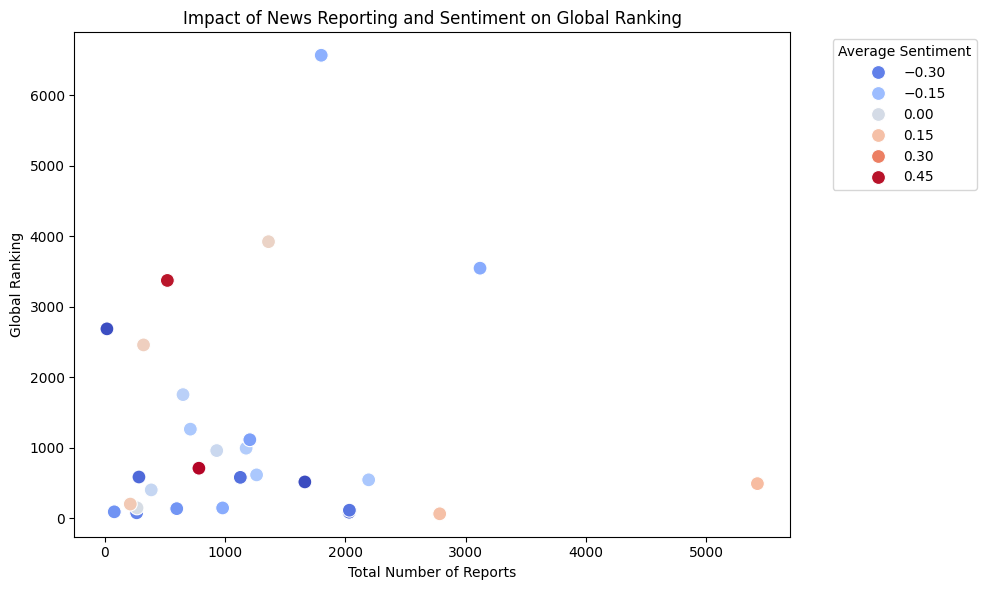

In [83]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sent_dist[sent_dist['Total_reports']<10000], x='Total_reports', y='GlobalRank', hue='Average_sentiment', palette='coolwarm', s=100)

# Add title and labels
plt.title('Impact of News Reporting and Sentiment on Global Ranking')
plt.xlabel('Total Number of Reports')
plt.ylabel('Global Ranking')

# Show the plot
plt.legend(title='Average Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()